# Project Planning Stage (Individual)

In [1]:
# Run this cell before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# *(1) Data Description*: Players Data

- Number of Observations: 196
- Number of Variables: 7
- Name and Type of Variables: experience (chr), hashedEmail (chr), name (chr), gender (chr),
  played_hours (dbl), Age (dbl), subscribe (lgl)
- Variable Meanings:
  - experience: How adept the player was at the game seperated into 5 ranks: beginner, amateur, regular, pro, and veteran
  - hashedEmail: Each player's specific email identity
  - name: The name of the player
  - gender: The gender of the player (male, female, or other)
  - played_hours: The number of hours spent playing the game for each player
  - Age: The ages of the players
  - subscribe: If the player was subscribed to a game related newsletter (true or false)
- Any Issues in Data: there are some empty spots found in the data
- Issues that can't be directly seen: idk...
- How data was collected: Data was collected from a research group in Computer Science conducted by Frank Wood by using PlaiCraft to host a minecraft server recording player's actions and navigation through the world

- Summary statistics for the players data:

In [40]:
players <- read_csv("data/players.csv")
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Rounded to two decimal places mean, min, and max values for played_hours and Age respectively:

In [53]:
played_h_mean <- round(summary(players$played_hours)[["Mean"]], 2)
played_h_min <- round(min(players$played_hours),2)
played_h_max <- round(max(players$played_hours),2)

age_mean <- round(summary(players$Age)[["Mean"]], 2)
age_min <- round(min(players$Age, na.rm = TRUE),2)
age_max <- round(max(players$Age, na.rm = TRUE),2)

played_h_mean
played_h_min
played_h_max
age_mean
age_min
age_max

[1] 5.85

[1] 0

[1] 223.1

[1] 21.14

[1] 9

[1] 58

From the summary statistics for the played_hours column I can see that the mean is around 5.85, the min is 0.00, the max is 223.10, and the median is around 0.10. From the summary statistics for the age column I can see that the mean is around 21.14, the min is 9.00, the max is 58.00, and the median is around 19.00.

# *(1) Data Description*: Sessions Data

- Number of Observations: 1535
- Number of Variables: 5
- Name and Type of Variables: hashedEmail (chr), start_time (chr), end_time (chr),
  original_start_time (dbl), original_end_time (dbl)
- Variable Meanings:
  - hashedEmail: Each player's email identity
  - start_time: The exact start date of the player when they first started in the game (formatted as day/month/year)
  - end_time: The exact end date of the player when they stopped playing the game (formatted as day/month/year)
  - original_start_time: The start time of the player 
  - original_end_time: The end time of the player
- Any Issues in Data: The original start and end time numbers are extremely large
- Issues that can't be directly seen: idk...
- How data was collected: Data was collected from a research group in Computer Science conducted by Frank Wood by using PlaiCraft to host a minecraft server recording player's actions and navigation through the world

Summary statistics for sessions data:

In [4]:
sessions <- read_csv("data/sessions.csv")
summary(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

Rounded to two decimal places mean, min, and max values for original_start_time and original_end_time respectively:

In [54]:
original_st_mean <- round(summary(sessions$original_start_time)[["Mean"]],2)
original_st_min <- round(min(sessions$original_start_time),2)
original_st_max <- round(max(sessions$original_start_time),2)

original_et_mean <- round(summary(sessions$original_end_time)[["Mean"]],2)
original_et_min <- round(min(sessions$original_end_time, na.rm = TRUE),2)
original_et_max <- round(max(sessions$original_end_time, na.rm = TRUE),2)

original_st_mean
original_st_min
original_st_max
original_et_mean
original_et_min
original_et_max

[1] 1.719201e+12

[1] 1.7124e+12

[1] 1.72733e+12

[1] 1.719196e+12

[1] 1.7124e+12

[1] 1.72734e+12

From the summary statistics for the original_start_time column in the sessions dataset I can see that the mean is around 1719201355048.86, the min is 1.7124e+12, the max is 1.72733e+12, and the median is 1.719e+12. From the summary statistics for the original_end_time column in the sessions dataset I can see that the mean is around 1719195949119.37, the min is 1.7124e+12, the max is 1.72734e+12, and the median is around 1.719e+12.

# *(2) Questions*
**Broad Question:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific Question:** Can the variables experience and Age predict played_hours in the players dataset?

**How data will address the question:** The players data will help me answer this question since it provides me with the two columns experience and age that could affect the played_hours and seeing the amount of contribution done with these hours. In doing so I will use regression for my predictive analysis and wrangle the players data in a way where it only shows the 3 columns of interest (experience, Age, and played_hours) and do the analysis from those columns.

# *(3) Exploratory Data Analysis and Visualization*

Loading in players data:

In [35]:
players_data <- as_tibble(players) |>
    head(10)
players_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Loading in sessions data:

In [58]:
sessions_data <- as_tibble(sessions) |>
    head(10)
sessions_data

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Mean average for each quantitative variable in the players dataset:

In [55]:
players_mean_table <- tibble(variable = c("played_hours", "Age"), mean_average = c(played_h_mean, age_mean))
players_mean_table

variable,mean_average
<chr>,<dbl>
played_hours,5.85
Age,21.14


Load in visualization of played_hours VS experience:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


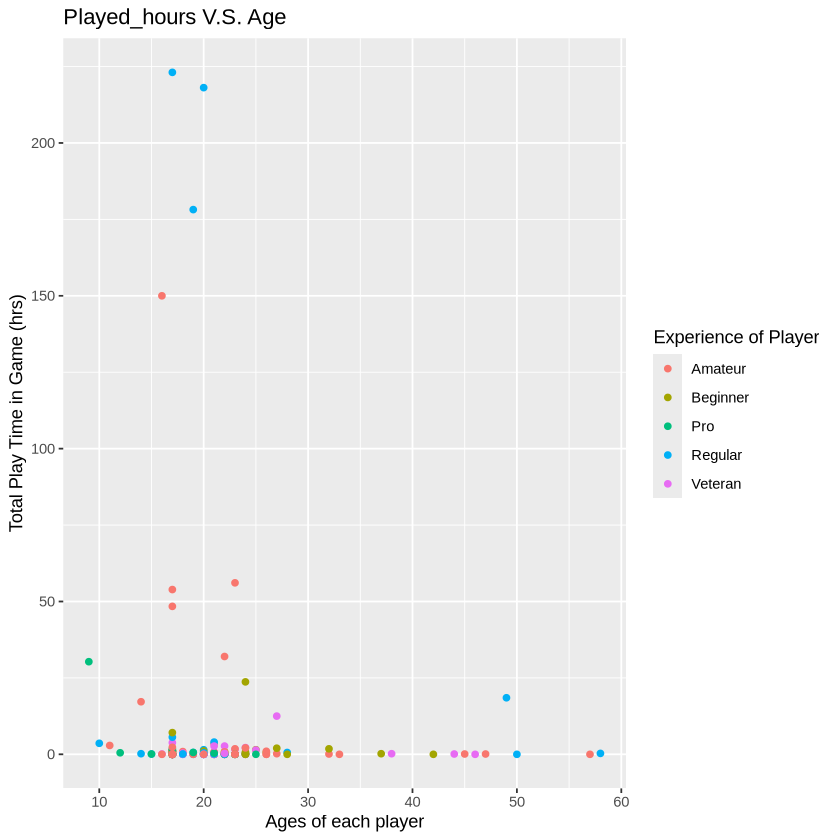

In [63]:
hours_experience_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    labs(
        x = "Ages of each player",
        y = "Total Play Time in Game (hrs)",
        color = "Experience of Player",
        title = "Played_hours V.S. Age")
hours_experience_plot

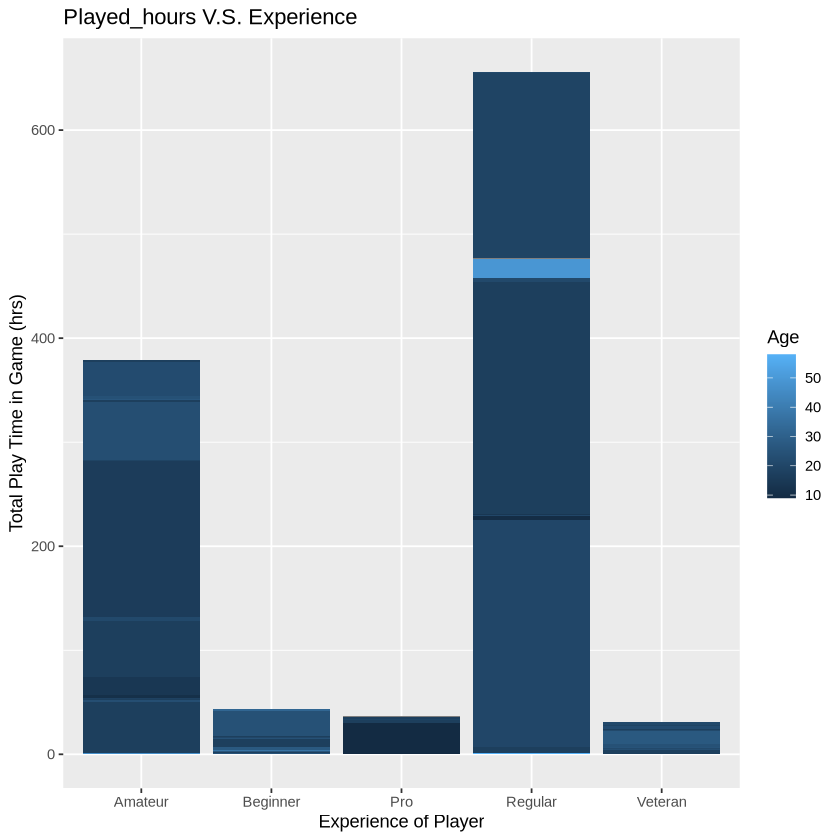

In [66]:
hours_age_plot <- players |>
    ggplot(aes(x = experience, y = played_hours, fill = Age)) +
    geom_bar(stat = "identity") +
    labs(
        x = "Experience of Player",
        y = "Total Play Time in Game (hrs)",
        fill = "Age",
        title = "Played_hours V.S. Experience") #+
    #scale_fill_manual(values = c("steelblue", "darkorange", "blue", "pink", "red"))
hours_age_plot

**Insights gained from the graphs above on the players dataset**: From the scatter plot I can see that people in the ages 15-25 had a lot more play time then from the other age groups which could mean that people around these ages have more time or have a bigger interest playing games. From the bar graph I can see that people in the amateur and regular experience groups played a lot more than the other experience groups which could be because it would take amatueur players a lot more time to get used to the game and understand the game mechanics whereas veteran players are very experienced with the game already so don't need to spend as much time in the game to get good in it. Also regular players could be more casual with their play style and spend more time just having fun.